# Natural Language Processsing with a Rule-based Model

Test if an out of the box, rule-based model can outperform the trained model.

## NLTK VADER

NLTK SentimentIntensityAnalyzer is built on the NLTK VADER package and is a rule/lexicon-based sentiment analyzer. The module is built to handle social media data. Pre-processing is handled internally within the modules (i.e. removing punctuation, stopwords, graphics, etc.). VADER was integrated into the NLTK python module

https://www.nltk.org/api/nltk.sentiment.vader.html

In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer # rule/lexicon-based sentiment analyzer
from pattern.en import sentiment
import os
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import pandas as pd

# supress warnings from sklearn
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# local imports
from pre_proc import clean_text

### Test NLTK Vader code on sentiment 140 data for comparison with Naive Bayes model

In [4]:
# constants 
DATA_DIR = 'C:\\Users\\keatu\\Regis_archive\\practicum2_data\\'
sia = SentimentIntensityAnalyzer()

In [5]:
# Get same training/test data used in the naive bayes model
s140df = pd.read_csv(os.path.join(DATA_DIR,"resources","s140_preproc.csv"), encoding='latin-1')
text=s140df['text']
target=s140df['target']
train_text, test_text, train_label, test_label=train_test_split(text, target, random_state=50)

In [6]:
# Make predictions with Vader
sia = SentimentIntensityAnalyzer()
test_scores = list(map(lambda x: sia.polarity_scores(x)['compound'], test_text))

In [7]:
# bin the scores to positive or negative sentiment to test against s140 data
def pos_neg_bin(score):
    if score < 0:
        return 0 # negative sentiment
    else:
        return 4 # positive sentiment
test_scores_bin = list(map(pos_neg_bin, test_scores))

[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

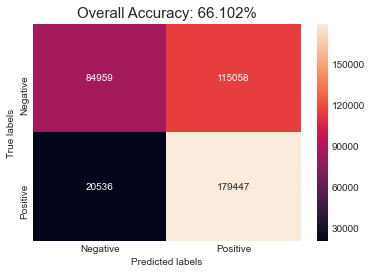

In [8]:
# print results
score = accuracy_score(test_label,test_scores_bin)
conf = confusion_matrix(test_label, test_scores_bin)

ax= plt.subplot()
sns.heatmap(conf, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Overall Accuracy: {:.3f}%'.format(score*100.0), size=15)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

## Try Pattern package

[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

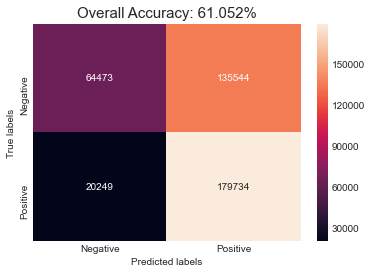

In [9]:
# use same steps as vader package
pattern_scores = list(map(lambda x: sentiment(x)[0], test_text))
pattern_scores_bin = list(map(pos_neg_bin, pattern_scores))

# plot results
score = accuracy_score(test_label,pattern_scores_bin)
conf = confusion_matrix(test_label, pattern_scores_bin)

ax= plt.subplot()
sns.heatmap(conf, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Overall Accuracy: {:.3f}%'.format(score*100.0), size=15)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

The VADER model significanly outperformed the Pattern package in terms of accuracy, but neither of these rule-based methods are as good as the Naive Bayes model. A couple of advantages to these packages, though, are that they are quick to implement and require no training and the output of these two methods is not just a binary--positive or negative; the resulting compound sentiment can be a range of values. This is likely also why the accuracies are much lower than our pre-trained model, because the compound scoring techniques from the rule-based methods allow for neutrality to be a factor--whereas here we just binned the output sentiment score to force a binary result. 

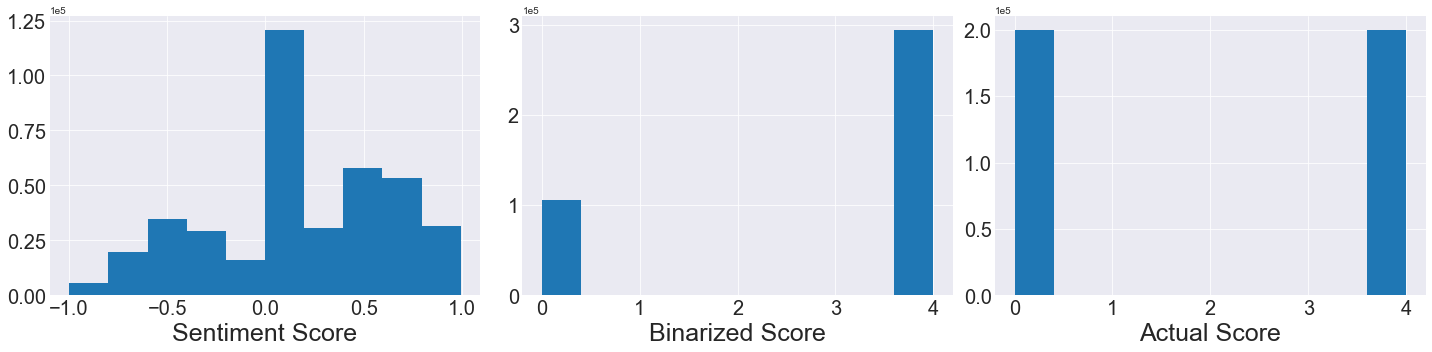

In [10]:
# Plot compare sentiment 
fig = plt.figure(figsize = (20,5))
ax1 = fig.add_subplot(131)
ax1.set_xlabel("Sentiment Score", size = 25)
ax1.hist(test_scores)

ax2 = fig.add_subplot(132)
ax2.hist(test_scores_bin)
ax2.set_xlabel("Binarized Score", size = 25)

ax3 = fig.add_subplot(133)
ax3.hist(test_label)
ax3.set_xlabel("Actual Score", size = 25)

for ax in (ax1,ax2,ax3):
    ax.tick_params(axis='x', labelsize= 20)
    ax.tick_params(axis='y', labelsize= 20)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.tight_layout()
